In [1]:
from prepare import *
from model import *


Using TensorFlow backend.


In [3]:
# Reset the graph
tf.reset_default_graph()

# Start interactive session
sess = tf.InteractiveSession()

#tf: will scale pixels between -1 and 1, sample-wise.

In [14]:
data_generator = generate_cpatches(1)
data_X  = next(data_generator)
data_x = data_X[0:1, :, :, 0:1]
data_mask = data_X[0:1, :, :, 1:2]
data_real = data_X[0:1, :, :, 2:3]
input_image = data_x[0, :, :, 0]
real_image = data_real[0, :, :, 0]


g 1
Patches size (1, 256, 256, 4)


In [5]:
patch_size = 256
input_x = tf.placeholder(tf.float32, [None, patch_size, patch_size, 1])
input_mask = tf.placeholder(tf.float32, [None, patch_size, patch_size, 1])
input_real = tf.placeholder(tf.float32, [None, patch_size, patch_size, 1])
input_boundary = tf.placeholder(tf.float32, [None, patch_size, patch_size, 1])

In [6]:
vgg_channels = build_vgg19(tf.multiply(input_real, 1 - input_mask))
vgg = build_vgg19(tf.multiply(input_real, input_mask))


In [15]:
pred_img = sess.run(vgg_channels, feed_dict={
                    input_real: data_real,
                    input_mask: data_mask
                   })

In [8]:
[(k,x.shape) for k,x in pred_img.items()]

[('input', (1, 256, 256, 3)),
 ('conv1_1', (1, 256, 256, 64)),
 ('conv1_2', (1, 256, 256, 64)),
 ('pool1', (1, 128, 128, 64)),
 ('conv2_1', (1, 128, 128, 128)),
 ('conv2_2', (1, 128, 128, 128)),
 ('pool2', (1, 64, 64, 128)),
 ('conv3_1', (1, 64, 64, 256)),
 ('conv3_2', (1, 64, 64, 256)),
 ('conv3_3', (1, 64, 64, 256)),
 ('conv3_4', (1, 64, 64, 256)),
 ('pool3', (1, 32, 32, 256)),
 ('conv4_1', (1, 32, 32, 512)),
 ('conv4_2', (1, 32, 32, 512)),
 ('conv4_3', (1, 32, 32, 512)),
 ('conv4_4', (1, 32, 32, 512)),
 ('pool4', (1, 16, 16, 512)),
 ('conv5_1', (1, 16, 16, 512)),
 ('conv5_2', (1, 16, 16, 512))]

In [20]:
img  = pred_img['input'][0,:,:,:]

In [10]:
print(img.max(),img.min())

0.4383837 -1.0


In [21]:
print(img.max(),img.min())

1.0 -1.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


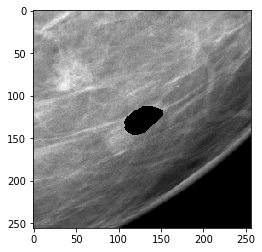

In [16]:
plt.imshow(pred_img['input'][0,:,:,:])

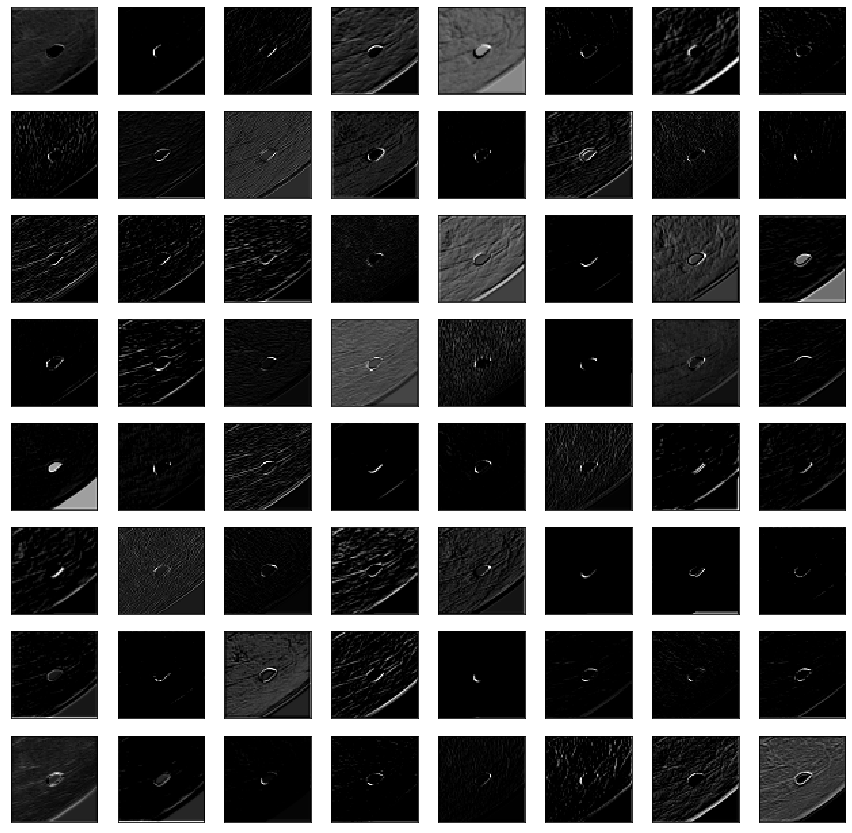

In [29]:
feature_maps = pred_img['pool2']
square = 8
ix = 1
fig = plt.figure(figsize= (15,15))
for _ in range(square):
	for _ in range(square):
		# specify subplot and turn of axis
		ax = plt.subplot(square, square, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		plt.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
		ix += 1
# show the figure
plt.show()

In [ ]:
plt.imshow(data_real[0,:,:,0])